In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/IIRS/Raster Data/13Oct08_Raster_data Svnit/l3f43m1613oct08

/content/drive/MyDrive/IIRS/Raster Data/13Oct08_Raster_data Svnit/l3f43m1613oct08


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from osgeo import osr
import math

In [ ]:
base= r'L3-NF43M16-094-057-13oct08-BAND3.tif'

In [ ]:
base="/content/ocm2_ndvi_filt_01to15_jan2020_v01_01.tif"

In [ ]:
ds=gdal.Open(base)

In [ ]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7ff616ed4450> >

In [ ]:
print('file list',ds.GetFileList())

file list ['/content/ocm2_ndvi_filt_01to15_jan2020_v01_01.tif']


In [ ]:
print('width',ds.RasterXSize)

width 3262


In [ ]:
print('width',ds.RasterYSize)

width 3303


In [ ]:
print ('coordinate system:',ds.GetProjection())

coordinate system: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [ ]:
gt=ds.GetGeoTransform()

In [ ]:
gt

(67.69755372474683, 0.00925926, 0.0, 37.241531321930125, 0.0, -0.00925926)

In [ ]:
print('Origin ', (gt[0],gt[3]))
print('Pixel size', (gt[1],gt[2]))


Origin  (67.69755372474683, 37.241531321930125)
Pixel size (0.00925926, 0.0)


In [ ]:
print('Upper left corner',gdal.ApplyGeoTransform(gt,0,0))
print('Upper right corner',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower left corner',gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Upper left corner',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Upper left corner',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper left corner [67.69755372474683, 37.241531321930125]
Upper right corner [97.90125984474682, 37.241531321930125]
Lower left corner [67.69755372474683, 6.658195541930127]
Upper left corner [97.90125984474682, 6.658195541930127]
Upper left corner [82.79940678474682, 21.949863431930126]


In [ ]:
import pprint
print("Mata data",ds.GetMetadata())

Mata data {'AREA_OR_POINT': 'Area'}


In [ ]:
print("Mata data",ds.GetMetadata('IMAGE STRUCTURE'))

Mata data {}


In [ ]:
pprint.pprint(ds.GetMetadata())

{'AREA_OR_POINT': 'Area'}


In [ ]:
print('Band',ds.RasterCount)

Band 1


In [ ]:
for i in range(1,ds.RasterCount+1):
  band=ds.GetRasterBand(i)
  interp= band.GetColorInterpretation()
  #interp_name= band.GetColorInterpretationName(interp)
  (w,h)=band.GetBlockSize()
  print("w h ".format(i,w,h,))
  ovr_count=band.GetOverviewCount()
  print('hh',band.GetOverview)

w h 
hh <bound method Band.GetOverview of <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff61e98b9f0> >>


In [ ]:
data=band.ReadAsArray()

In [ ]:
data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

<function matplotlib.pyplot.colorbar>

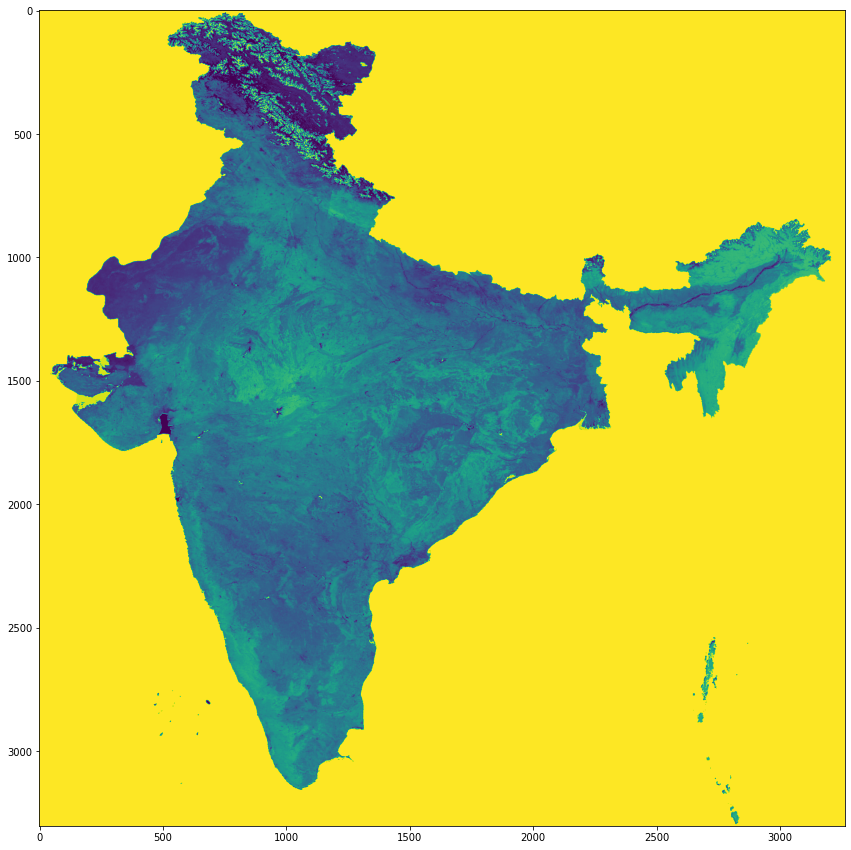

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(data)
plt.colorbar

Partical Raster Reading Data

In [ ]:
data=band.ReadAsArray(xoff=600,yoff=600,win_xsize=1152,win_ysize=1152)

In [ ]:
fileformat='GTiff'
driver =gdal.GetDriverByName(fileformat)

In [ ]:
print(driver.ShortName)
#print(driver.longName)

GTiff


In [ ]:
metadata=driver.GetMetadata()

In [ ]:
metadata

{'DCAP_CREATE': 'YES',
 'DCAP_CREATECOPY': 'YES',
 'DCAP_OPEN': 'YES',
 'DCAP_RASTER': 'YES',
 'DCAP_VIRTUALIO': 'YES',
 'DMD_CREATIONDATATYPES': 'Byte UInt16 Int16 UInt32 Int32 Float32 Float64 CInt16 CInt32 CFloat32 CFloat64',
 'DMD_CREATIONOPTIONLIST': "<CreationOptionList>   <Option name='COMPRESS' type='string-select'>       <Value>NONE</Value>       <Value>LZW</Value>       <Value>PACKBITS</Value>       <Value>JPEG</Value>       <Value>CCITTRLE</Value>       <Value>CCITTFAX3</Value>       <Value>CCITTFAX4</Value>       <Value>DEFLATE</Value>       <Value>LZMA</Value>   </Option>   <Option name='PREDICTOR' type='int' description='Predictor Type (1=default, 2=horizontal differencing, 3=floating point prediction)'/>   <Option name='DISCARD_LSB' type='string' description='Number of least-significant bits to set to clear as a single value or comma-separated list of values for per-band values'/>   <Option name='JPEG_QUALITY' type='int' description='JPEG quality 1-100' default='75'/>   <

In [ ]:
src_file= 'L3-NF43M16-094-057-13oct08-BAND3.tif'
dst_filename = 'opraster1.tif'
src_ds= gdal.Open(src_file)

In [ ]:


src_file= 'ocm2_ndvi_filt_01to15_jan2020_v01_01.tif'
dst_filename = 'opr1.tif'
src_ds= gdal.Open(src_file)

In [ ]:
dst_ds = driver.CreateCopy(dst_filename, src_ds)

ValueError: ignored

In [ ]:
print(data)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 77  95 105 ... 117 131 124]
 [100 101 110 ... 131 132 130]
 [103 106 109 ... 137 136 122]]


In [ ]:
inv_data=np.invert(data)

<function matplotlib.pyplot.colorbar>

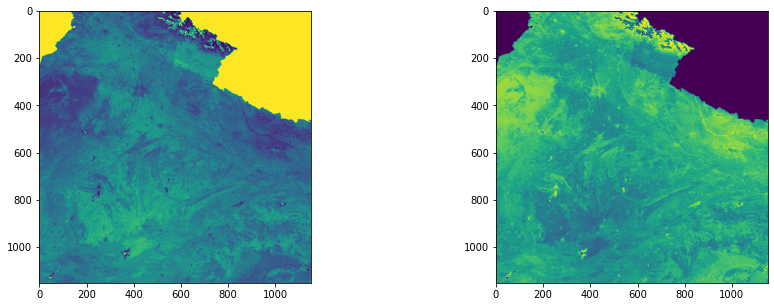

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(inv_data)
plt.colorbar

In [ ]:
out_band=dst_ds.GetRasterBand(1)

NameError: ignored

In [ ]:
out_band.WriteArray(inv_data)

NameError: ignored

In [ ]:
out_band.FlushCache()

In [ ]:
file_names=['L3-NF43M16-094-057-17Jan16-BAND2.tif','L3-NF43M16-094-057-17Jan16-BAND3.tif','L3-NF43M16-094-057-17Jan16-BAND4.tif']

In [ ]:
cd /content/drive/MyDrive/IIRS/Raster Data/17Jan16_Raster Data SVNIT/l3f43m1617jan16

/content/drive/MyDrive/IIRS/Raster Data/17Jan16_Raster Data SVNIT/l3f43m1617jan16


In [ ]:
img_data=list()
for file in file_names:
  #print(file)
  ds=gdal.Open(file,gdal.GA_ReadOnly)
  data=ds.ReadAsArray()
  img_data.append(data)

In [ ]:
img_data

[array([[ 96,  97,  96, ..., 102, 101, 104],
        [ 96,  96,  98, ..., 102, 101, 102],
        [ 97,  98,  98, ..., 101, 100, 100],
        ...,
        [ 98,  99,  98, ...,  99, 100,  99],
        [ 98,  96,  97, ..., 100, 100, 100],
        [ 99,  98,  97, ..., 100, 100,  99]], dtype=uint16),
 array([[84, 83, 84, ..., 83, 86, 89],
        [84, 82, 83, ..., 84, 84, 89],
        [86, 85, 85, ..., 82, 84, 86],
        ...,
        [85, 85, 86, ..., 79, 79, 79],
        [84, 83, 85, ..., 79, 80, 80],
        [85, 86, 85, ..., 79, 81, 82]], dtype=uint16),
 array([[100, 101, 110, ..., 132, 127, 127],
        [ 98,  98, 112, ..., 133, 132, 131],
        [101, 102, 107, ..., 132, 133, 132],
        ...,
        [106, 112, 111, ..., 139, 139, 138],
        [110, 114, 111, ..., 136, 138, 136],
        [113, 112, 111, ..., 136, 136, 136]], dtype=uint16)]

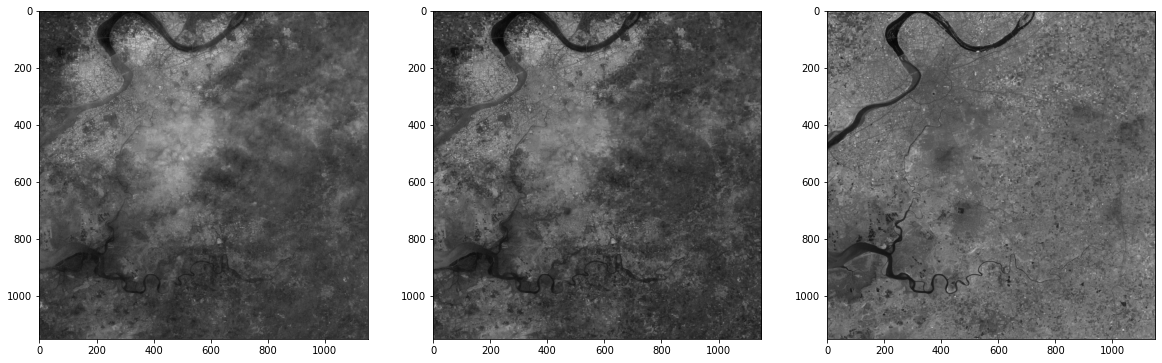

In [ ]:
fig=plt.figure(figsize=(20,25))
for i in range(1,4):
  plt.subplot(1,3,i)
  plt.imshow(img_data[i-1],cmap='gray')

In [ ]:
dst_file="stackrgb.tif"
height,width=img_data[0].shape

In [ ]:
height,width

(1151, 1151)

In [ ]:
drv=gdal.GetDriverByName('Gtiff')
dst_ds1=drv.Create(dst_file,width,height,bands=4,eType=gdal.GDT_Int16)
dst_ds1.SetProjection(ds.GetProjection())
dst_ds1.SetGeoTransform(ds.GetGeoTransform())

0

In [ ]:
for i in range(1,4):
  band=dst_ds1.GetRasterBand(i)
  band.WriteArray(img_data[i-1])

In [ ]:
dsrgb=gdal.Open('stackrgb.tif')
data_rgb=dsrgb.ReadAsArray(buf_type=gdal.GDT_Byte)
rgb=np.dstack(tuple(data_rgb))
plt.imshow(rgb)

AttributeError: ignored

Reprojecting Raster image 

In [ ]:
pwd

'/content/drive/My Drive/IIRS/Raster Data/17Jan16_Raster Data SVNIT/l3f43m1617jan16'

In [ ]:
f_n='L3-NF43M16-094-057-17Jan16-BAND4.tif'

In [ ]:
old_ds=gdal.Open(f_n)

In [ ]:
old_ds.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

In [ ]:
crs=osr.SpatialReference()


In [ ]:
crs.SetProjCS('UTM')
crs.SetUTM(44)
crs.SetWellKnownGeoCS('WGS84')

AttributeError: ignored

In [ ]:
crs.ExportToWkt()

'PROJCS["UTM",PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1]]'

In [ ]:
vrt_ds=gdal.AutoCreateWarpedVRT(old_ds,old_ds.GetProjection(),crs.ExportToWkt(),gdal.GRIORA_NearestNeighbour)

<function matplotlib.pyplot.colorbar>

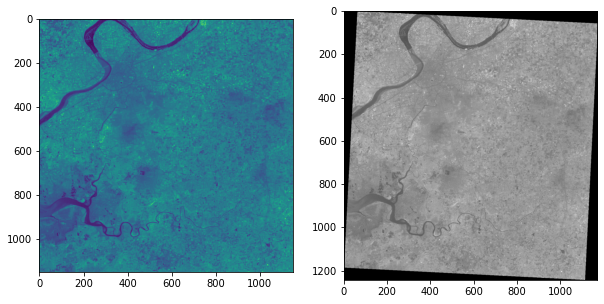

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(old_ds.ReadAsArray())
plt.subplot(1,2,2)
plt.imshow(vrt_ds.ReadAsArray(), cmap="gray")
plt.colorbar

NDVI =NIR-RED/NIR+RED

In [3]:
pwd

'/content'

In [4]:
nir_image='L3-NF43M16-094-057-13oct08-BAND5.tif'
#green_image='L3-NF43M16-094-057-13oct08-BAND3.tif'
red_image='L3-NF43M16-094-057-13oct08-BAND4.tif'

In [5]:
nir_ds=gdal.Open(nir_image)
#green_ds=gdal.Open(green_image)
red_ds=gdal.Open(red_image)

In [6]:
red_band = red_ds.GetRasterBand(1)
nir_band = nir_ds.GetRasterBand(1)
#green_band = green_ds.GetRasterBand(1)
print(gdal.GetDataTypeName(red_band.DataType))

Byte


In [8]:
import numpy as np


In [9]:
red=red_band.ReadAsArray().astype(np.int32)
nir=nir_band.ReadAsArray().astype(np.int32)
#green=green_band.ReadAsArray().astype(np.int32)

In [10]:
ndvi=(nir-red)/(nir+red)

In [ ]:
#ndwi=(green-nir)/(green+nir)
#ndwi=np.where(ndwi>0.1,ndwi,0)

In [21]:
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib
%matplotlib inline


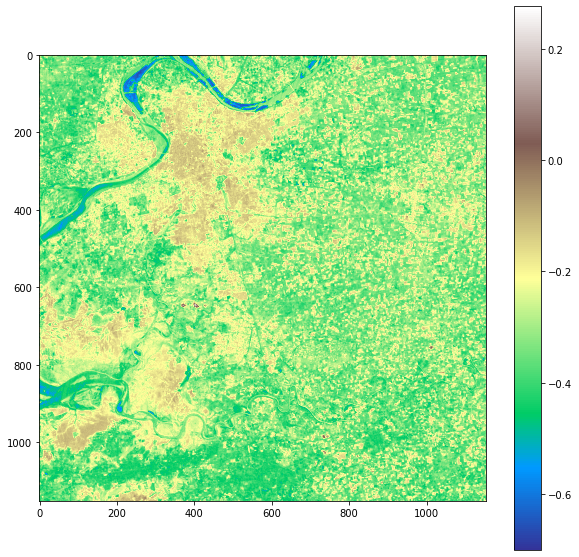

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(ndvi,cmap='terrain')
plt.colorbar()

<function matplotlib.pyplot.colorbar>

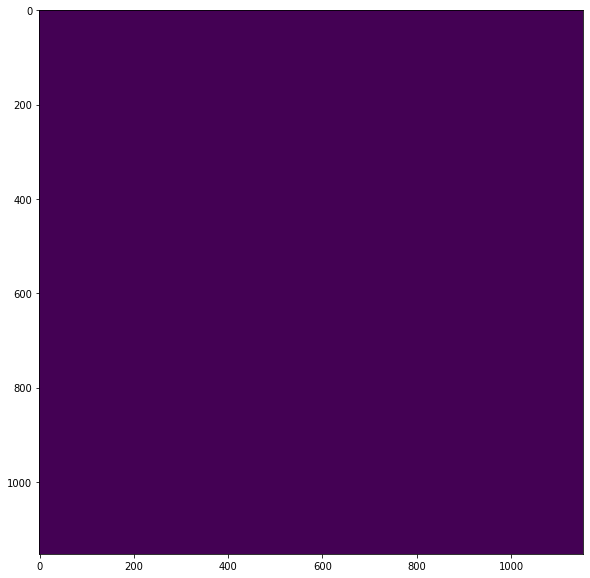

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwi)
plt.colorbar

In [ ]:
dem='L3-NF43M16-094-057-13oct08-BAND4.tif'

In [ ]:
kk=gdal.DEMProcessing('L3-NF43M16-094-057-13oct08-BAND3.tif',dem,processing = 'hillshade' , format='GTiff')

In [ ]:
slope=gdal.Open('L3-NF43M16-094-057-13oct08-BAND4.tif')

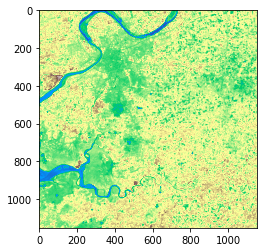

In [ ]:
plt.imshow(slope.ReadAsArray(),cmap='terrain')

In [1]:
pip install GDAL

In [2]:
import gdal
from gdal import Open
from ndvi import ndvi

# Open NIR image and get its only band.
nir_tiff = Open(r'NIR_IMAGE.tif')
nir_band = nir_tiff.GetRasterBand(1)

# Open red image and get its only band.
red_tiff = Open(r'RED_IMAGE.tif')
red_band = red_tiff.GetRasterBand(1)

# Get the rows and cols from one of the images (both should always be the same)
rows, cols, geotransform = nir_tiff.RasterYSize, nir_tiff.RasterXSize, nir_tiff.GetGeoTransform()
print(geotransform)

# Set an output for a 16-bit unsigned integer (0-255)
out_tiff_int16 = r'NDVI_INT16.tif'

# Set the output for a 32-bit floating point (-1 to 1)
out_tiff_float32 = r'NDVI_FLOAT32.tif'

# Run the function for unsigned 16-bit integer
ndvi(nir_band, red_band, rows, cols, geotransform, out_tiff_int16, gdal.GDT_UInt16)

# Run the function for 32-bit floating point
ndvi(nir_band, red_band, rows, cols, geotransform, out_tiff_float32, gdal.GDT_Float32)

print('done')

ModuleNotFoundError: ignored